# Project HR

Predict attrition of your valuable employees

[IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
num_col = list(df.describe().columns)
col_categorical = list(set(df.columns).difference(num_col))
remove_list = ['EmployeeCount', 'EmployeeNumber', 'StandardHours']
col_numerical = [e for e in num_col if e not in remove_list]
attrition_to_num = {'Yes': 0,
                    'No': 1}
df['Attrition_num'] = df['Attrition'].map(attrition_to_num)
col_categorical.remove('Attrition')
df_cat = pd.get_dummies(df[col_categorical])
X = pd.concat([df[col_numerical], df_cat], axis=1)
y = df['Attrition_num']

# Decision Tree

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
clf = DecisionTreeClassifier(random_state=42)

In [8]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))


In [11]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       918

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[184   0]
 [  0 918]]

Average Accuracy: 	 0.7731
Accuracy SD: 		 0.0229


/var/folders/4m/7mpb_q5j65zdcnwbryv2_f8h0000gn/T/ipykernel_14225/3142829775.py:14: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')


In [12]:
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7717

Classification Report: 
               precision    recall  f1-score   support

           0       0.28      0.38      0.32        53
           1       0.89      0.84      0.86       315

    accuracy                           0.77       368
   macro avg       0.59      0.61      0.59       368
weighted avg       0.80      0.77      0.78       368


Confusion Matrix: 
 [[ 20  33]
 [ 51 264]]



The result is clearly not satisfactory. We will revisit this project after we covered ensemble model.

****

# Bagging

In [13]:
from sklearn.ensemble import BaggingClassifier

In [14]:
bag_clf = BaggingClassifier(estimator=clf, n_estimators=100,
                            bootstrap=True, n_jobs=-1, random_state=42)

In [15]:
bag_clf.fit(X_train, y_train.ravel())

/var/folders/4m/7mpb_q5j65zdcnwbryv2_f8h0000gn/T/ipykernel_14225/370259190.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  bag_clf.fit(X_train, y_train.ravel())


BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [16]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       918

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[184   0]
 [  0 918]]



/var/folders/4m/7mpb_q5j65zdcnwbryv2_f8h0000gn/T/ipykernel_14225/3142829775.py:14: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')


Average Accuracy: 	 0.8512
Accuracy SD: 		 0.0239
Test Result:

accuracy score: 0.8668

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.26      0.36        53
           1       0.89      0.97      0.93       315

    accuracy                           0.87       368
   macro avg       0.73      0.62      0.64       368
weighted avg       0.84      0.87      0.84       368


Confusion Matrix: 
 [[ 14  39]
 [ 10 305]]



***

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf_clf = RandomForestClassifier(n_estimators=100)

In [19]:
rf_clf.fit(X_train, y_train.ravel())

/var/folders/4m/7mpb_q5j65zdcnwbryv2_f8h0000gn/T/ipykernel_14225/627345210.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf_clf.fit(X_train, y_train.ravel())


RandomForestClassifier()

In [20]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       918

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[184   0]
 [  0 918]]



/var/folders/4m/7mpb_q5j65zdcnwbryv2_f8h0000gn/T/ipykernel_14225/3142829775.py:14: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')


Average Accuracy: 	 0.8557
Accuracy SD: 		 0.0169
Test Result:

accuracy score: 0.8696

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.19      0.29        53
           1       0.88      0.98      0.93       315

    accuracy                           0.87       368
   macro avg       0.77      0.59      0.61       368
weighted avg       0.85      0.87      0.84       368


Confusion Matrix: 
 [[ 10  43]
 [  5 310]]



In [21]:
import seaborn as sns

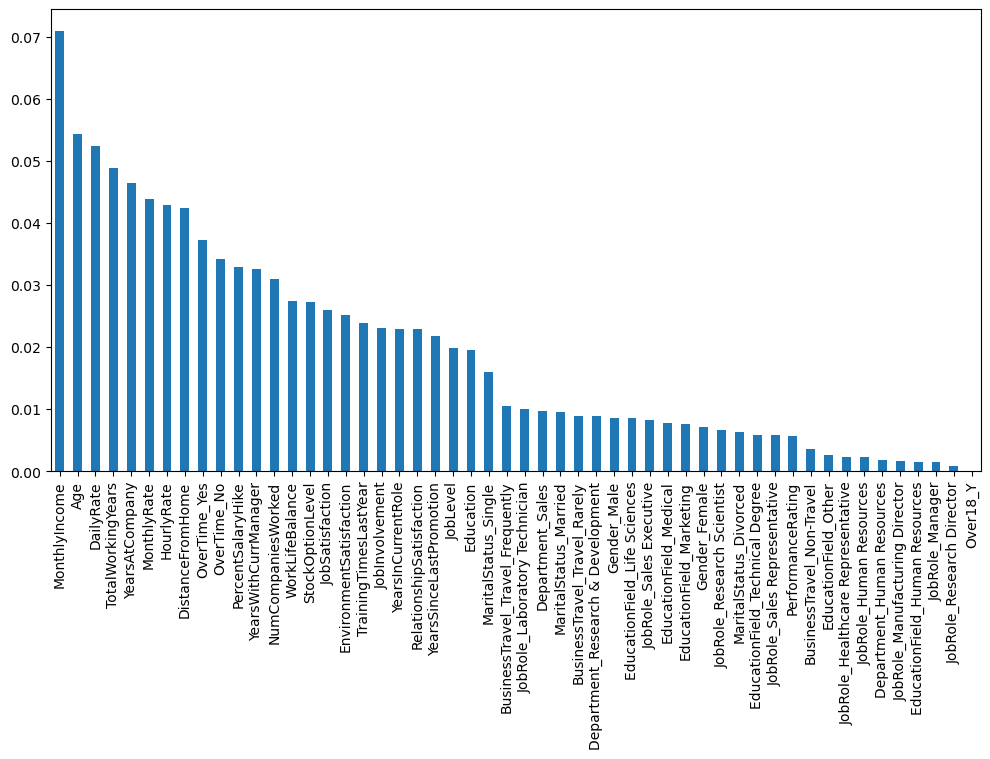

In [22]:
pd.Series(rf_clf.feature_importances_,
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

# AdaBoost

In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
ada_clf = AdaBoostClassifier(algorithm='SAMME')

In [32]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME')

In [33]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8866

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.41      0.55       184
           1       0.89      0.98      0.94       918

    accuracy                           0.89      1102
   macro avg       0.86      0.70      0.74      1102
weighted avg       0.88      0.89      0.87      1102


Confusion Matrix: 
 [[ 75 109]
 [ 16 902]]

Average Accuracy: 	 0.8684
Accuracy SD: 		 0.0233
Test Result:

accuracy score: 0.8668

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.36      0.44        53
           1       0.90      0.95      0.92       315

    accuracy                           0.87       368
   macro avg       0.73      0.66      0.68       368
weighted avg       0.85      0.87      0.85       368


Confusion Matrix: 
 [[ 19  34]
 [ 15 300]]



***

# AdaBoost + RandomForest

In [36]:
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=100, algorithm='SAMME')
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', estimator=RandomForestClassifier(),
                   n_estimators=100)

In [37]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       918

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[184   0]
 [  0 918]]

Average Accuracy: 	 0.8585
Accuracy SD: 		 0.0203
Test Result:

accuracy score: 0.8587

Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.15      0.24        53
           1       0.87      0.98      0.92       315

    accuracy                           0.86       368
   macro avg       0.70      0.56      0.58       368
weighted avg       0.82      0.86      0.82       368


Confusion Matrix: 
 [[  8  45]
 [  7 308]]



***

# Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
gbc_clf = GradientBoostingClassifier(n_estimators=100)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [41]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9610

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.77      0.87       184
           1       0.96      1.00      0.98       918

    accuracy                           0.96      1102
   macro avg       0.98      0.88      0.92      1102
weighted avg       0.96      0.96      0.96      1102


Confusion Matrix: 
 [[141  43]
 [  0 918]]

Average Accuracy: 	 0.8693
Accuracy SD: 		 0.0279
Test Result:

accuracy score: 0.8668

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.32      0.41        53
           1       0.89      0.96      0.92       315

    accuracy                           0.87       368
   macro avg       0.73      0.64      0.67       368
weighted avg       0.85      0.87      0.85       368


Confusion Matrix: 
 [[ 17  36]
 [ 13 302]]



***

# XGBoost

In [42]:
import xgboost as xgb

In [43]:
xgb_clf = xgb.XGBClassifier(n_estimators=100)
xgb_clf.fit(X_train, y_train.ravel())

/var/folders/4m/7mpb_q5j65zdcnwbryv2_f8h0000gn/T/ipykernel_14225/247083577.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  xgb_clf.fit(X_train, y_train.ravel())


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       918

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[184   0]
 [  0 918]]

Average Accuracy: 	 0.8567
Accuracy SD: 		 0.0304
Test Result:

accuracy score: 0.8614

Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.30      0.39        53
           1       0.89      0.96      0.92       315

    accuracy                           0.86       368
   macro avg       0.71      0.63      0.65       368
weighted avg       0.84      0.86      0.84       368


Confusion Matrix: 
 [[ 16  37]
 [ 14 301]]



***